In [24]:
import numpy as np
import geopandas
import rasterio
import matplotlib.pyplot as plt
from shapely.geometry import Point

import os
import sys  

root = os.getcwd() + "/.."

sys.path.insert(0, root)

import rasterio
import rasterio.plot

import src.manageExperiments as me
#importlib.reload(me)

In [25]:
fn = "linz_with_init_net.txt"
setup = me.readConfigFile(fn)


In [26]:
image = "../data/" + setup["folder_input"] + setup["input_ntli"]


In [27]:
image

'../data/locations/linz/world_atlas_linzn'

In [28]:
tiff = rasterio.open(image)

In [29]:
tiff.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 59,
 'height': 62,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.008333330000000003, 0.0, 14.02492239,
        0.0, -0.008333329999999937, 48.587514784444444)}

In [6]:
#rasterio.plot.show(tiff, title = "Linz Night Time Image")

In [7]:
NTLI = tiff.read()[0]

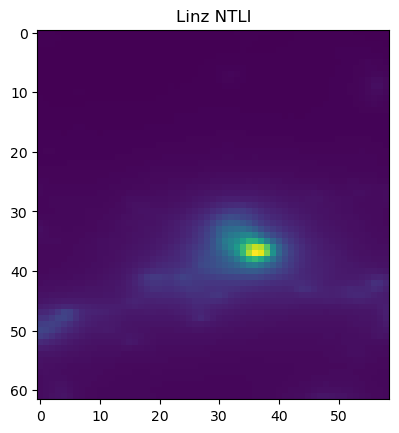

In [8]:
plt.imshow(NTLI)
plt.title("Linz NTLI")
plt.show()

In [9]:
s1 = (14.308185,48.305306)
s2 = (14.282806,48.305306)
s3 = (14.268312,48.293435)
s4 = (14.353622,48.288528)
s5 = (14.210051,48.258681)

locations = [s1,s2,s3,s4,s5]

In [14]:
#location of Lamhar's Light Quality Meter in format (lat, lon)
M = np.array([[tiff.transform[0], tiff.transform[1], tiff.transform[2]],[tiff.transform[3], tiff.transform[4], tiff.transform[5]]])
N = list()
for L in locations:
    s = L
    sensor_location = np.array(s)
    coord = np.linalg.inv(M[:,0:2])@(sensor_location-M[:,2])
    #coord = tiff.transform * sensor_location
    print("Location of Lamphars coordinate in the matrix in [lat, lon]: ", coord)
    six = tuple(coord[::-1].round().astype(int))
    N.append(six)
    NTLI[six]=np.max(NTLI)
    

Location of Lamphars coordinate in the matrix in [lat, lon]:  [33.9915268  33.86506768]
Location of Lamphars coordinate in the matrix in [lat, lon]:  [30.94604558 33.86506768]
Location of Lamphars coordinate in the matrix in [lat, lon]:  [29.20676488 35.28958825]
Location of Lamphars coordinate in the matrix in [lat, lon]:  [39.44396898 35.87842848]
Location of Lamphars coordinate in the matrix in [lat, lon]:  [22.21544209 39.46006992]


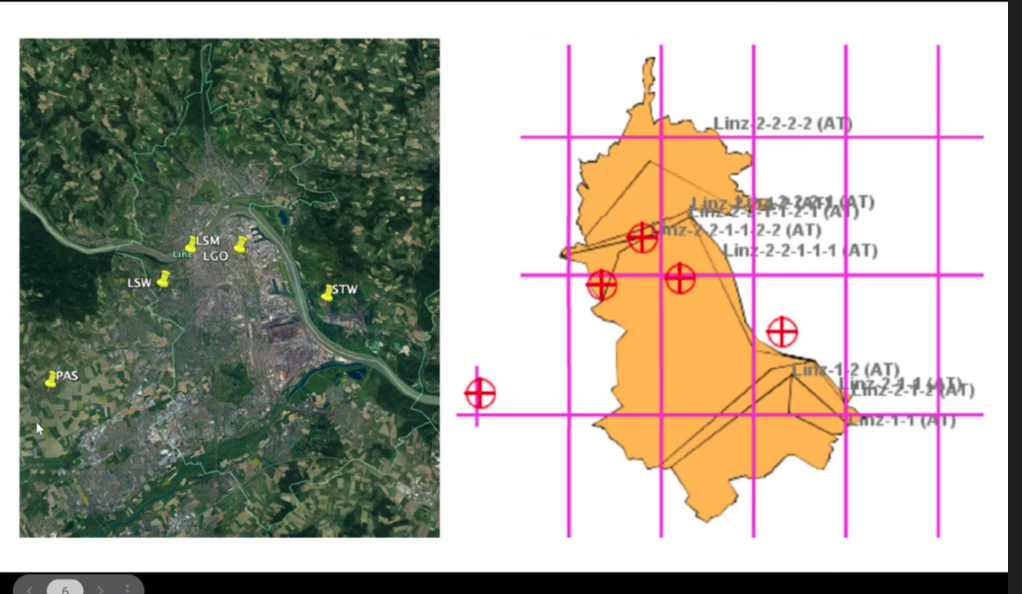

Text(0.5, 1.0, 'Sensor Locations in LINZ ')

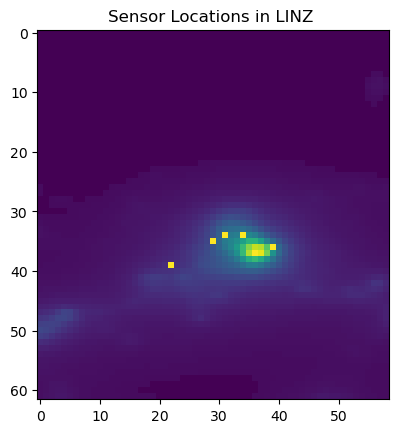

In [15]:


plt.imshow(NTLI*(NTLI>0.15))
plt.title("Sensor Locations in LINZ ")

References

https://geobgu.xyz/py/rasterio.html

Make LFS works

git config lfs.activitytimeout 60


In [16]:
N

[(34, 34), (34, 31), (35, 29), (36, 39), (39, 22)]